In [1]:
import pdb
import numpy as np
import random
import math
import argparse
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU

from shutil import copyfile
import scipy
from sklearn.model_selection import train_test_split

#### Make Data

In [2]:
# Train Y value
def get_Sin_Data(count, a, b, c=0, d=0, y_clip=None):
    
    #X_data = 2 * np.pi / b * cycle / count * np.arange(base, count)
    X_data = np.sort(np.random.uniform(Minimum, Maximum, size=(count,1)))
    Y_data = a * np.sin(b*X_data + c) + d
    
    if y_clip != None:
        idx = np.where(y_clip[0] <= y and y<=y_clip[1])
        X_data = X_data[idx]
        Y_data = Y_data[idx]
        
    return X_data, Y_data

In [3]:
def plotLoss(history):
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plotSinData(a, b, c, d):
    
    x = np.arange(Minimum, Maximum ,0.1)   # start,stop,step
    y = a* np.sin(b*x + c) +d
    plt.plot(x,y, 'y.--', alpha = 0.5)
    
def plotData(X_data, Y_data, data_period, params=None, model=None, title_name=None):
    
    plt.figure(figsize=(20,10))
    
    X_data = np.squeeze(X_data.copy())
    Y_data = np.squeeze(Y_data.copy())
    idx = np.argsort(X_data)
    X_data = X_data[idx]
    Y_data = Y_data[idx]
    
    plotSinData(params['a'], params['b'], params['c'], params['d'])
        
    plt.scatter(X_data, Y_data, color='violet', label="target")
        
    if model is not None:
        plt.scatter(X_data, model.predict(X_data%data_period), color='blue', label="output")
    plt.legend()
    if title_name is not None:
        plt.title(title_name)
    plt.show()

#### Model

In [4]:
def buildFCModel(input_shape,
                 hidden_layers=4,
                 hidden_neurons=128,
                 lr=0.0001):
    
    model = tf.keras.Sequential()
    model.add(Dense(hidden_neurons, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.03))
    
    for _ in range(hidden_layers):
        model.add(Dense(hidden_neurons))
        model.add(LeakyReLU(alpha=0.03))
    
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=Adam(lr=lr))
    #model.summary()
    
    board = TensorBoard(log_dir='model', histogram_freq=1, write_graph=True, write_images=False)
    board.set_model(model)
    
    return model, board

### y=sinx 데이터 개수에 따른 영향보기

In [12]:
hidden_layers = [2, 4, 8, 16]
hidden_neurons = [32, 64, 128, 256]

Minimum = -50; Maximum = 50
params={'a':1, 'b':1, 'c':0, 'd':0}
period = math.pi * 2

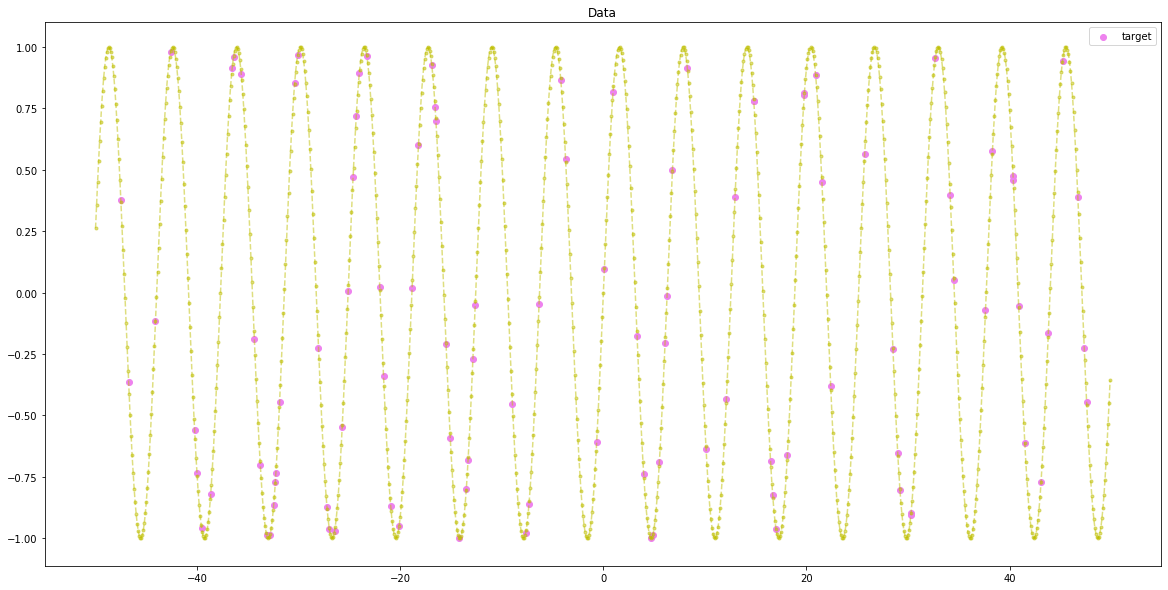

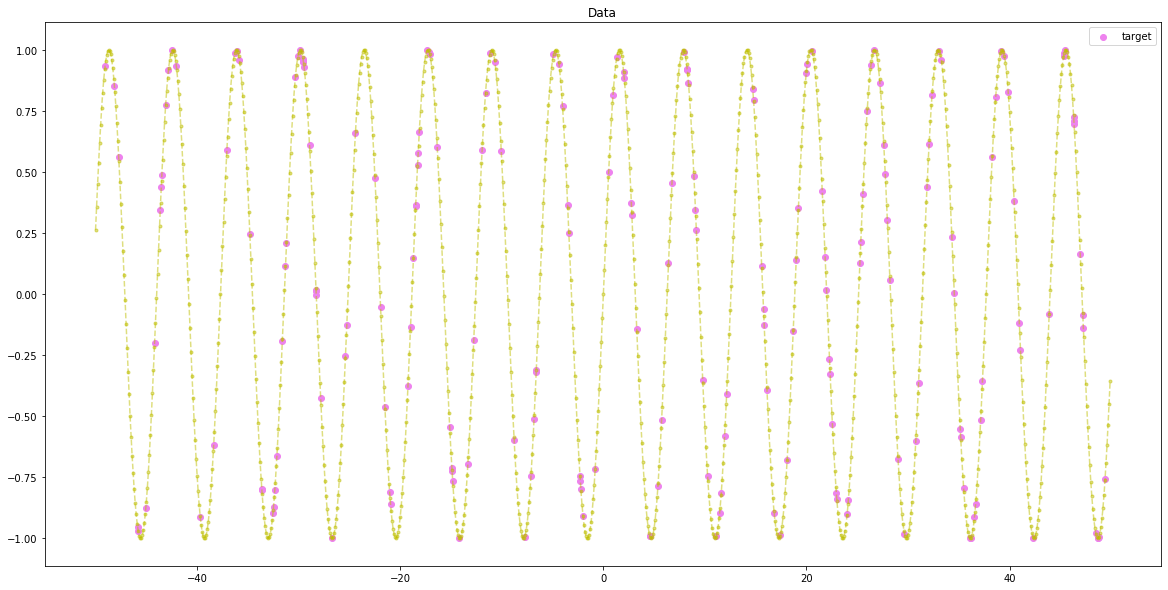

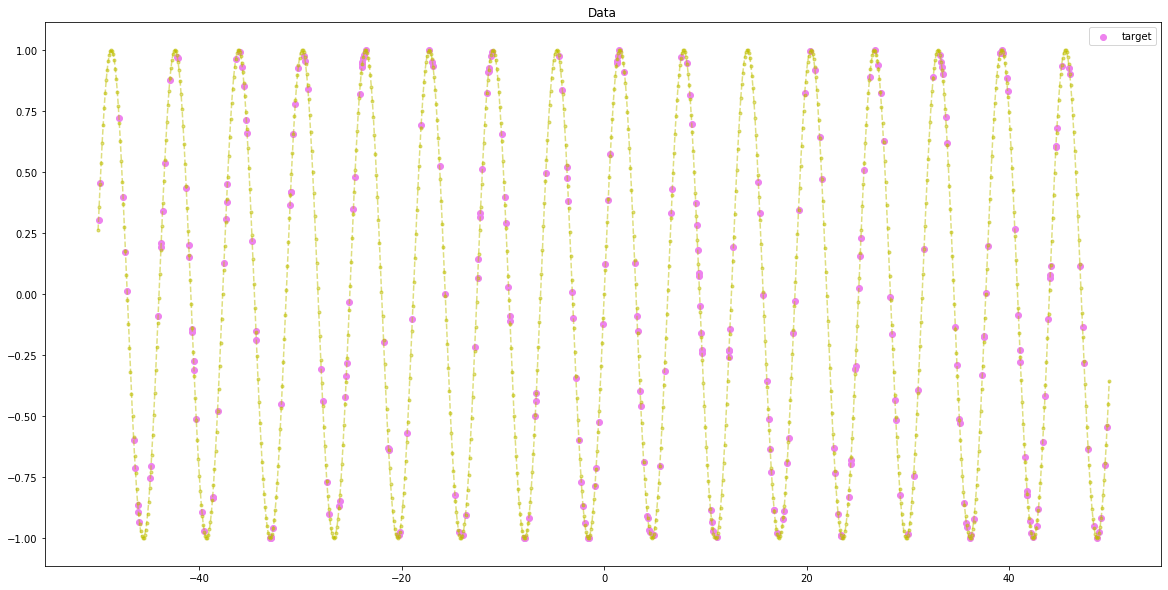

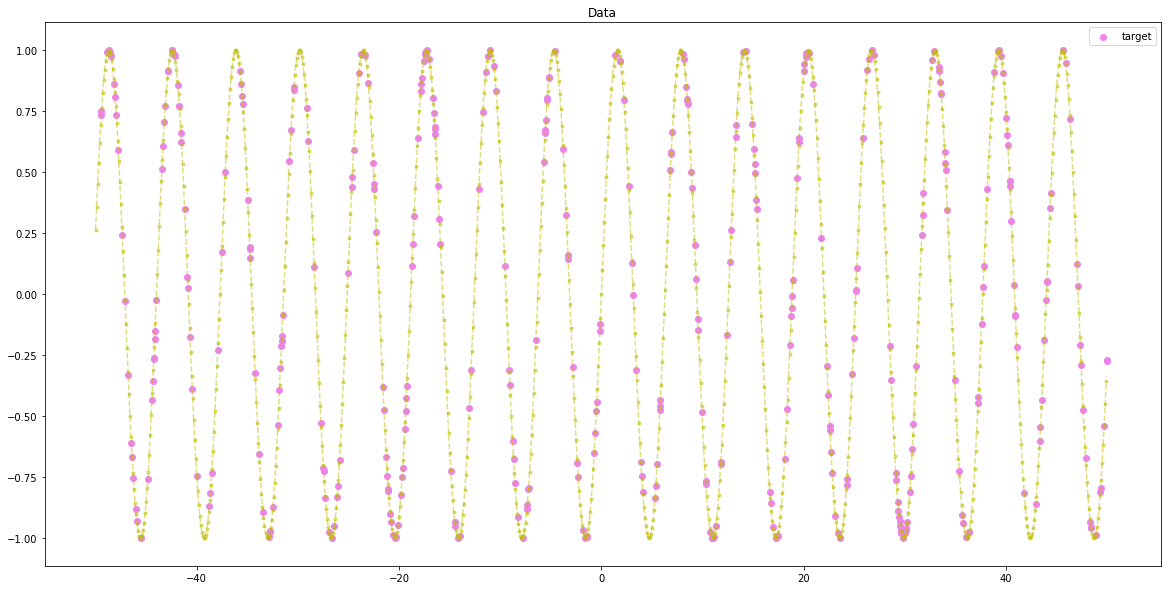

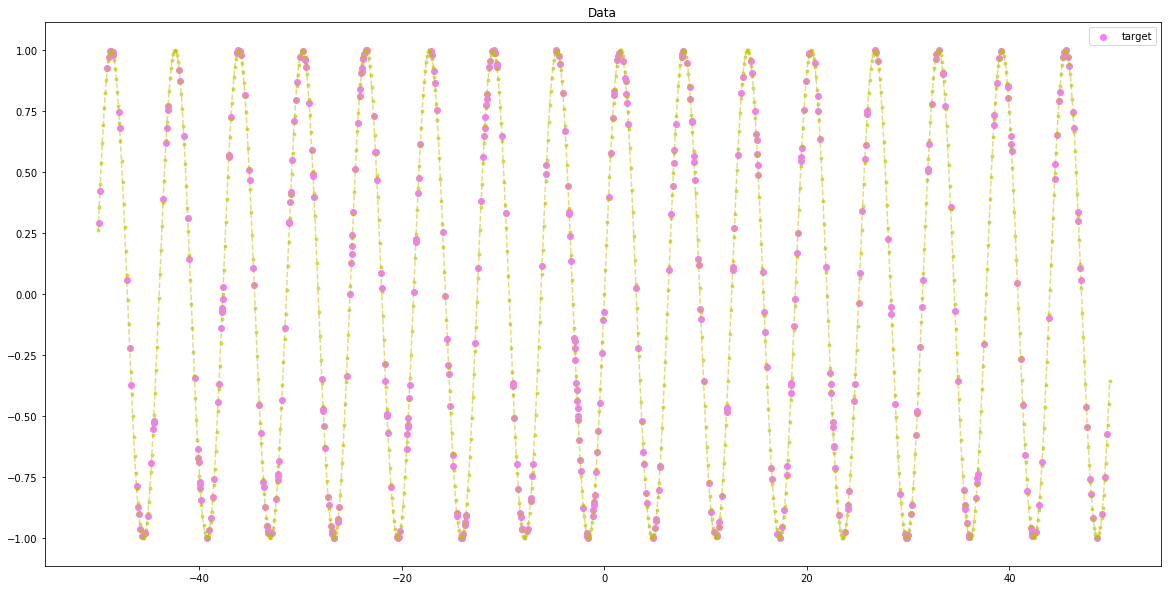

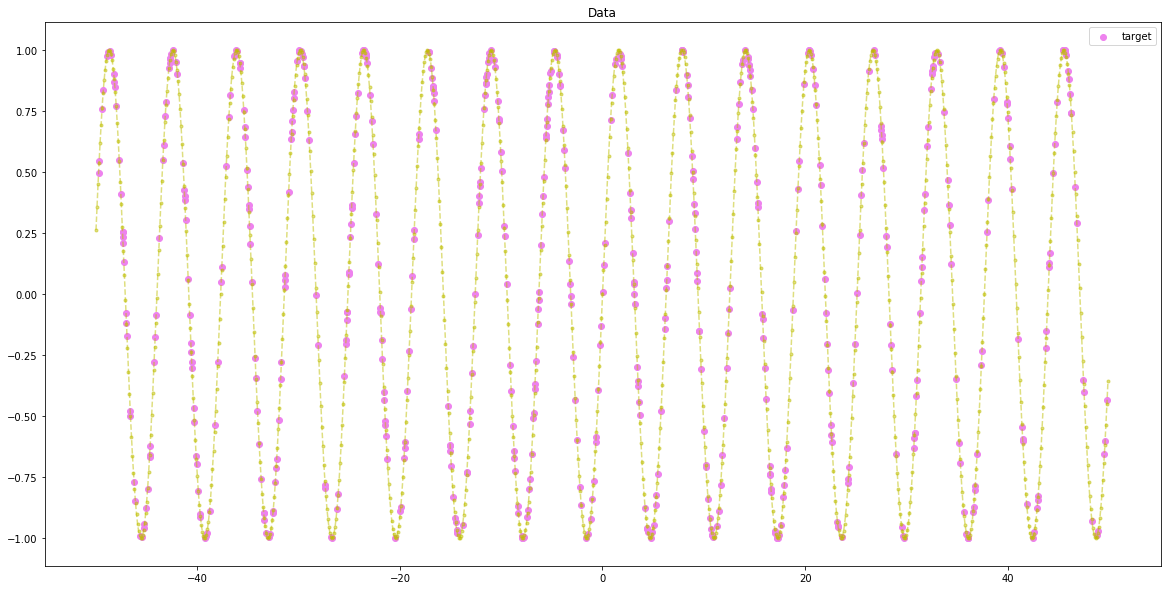

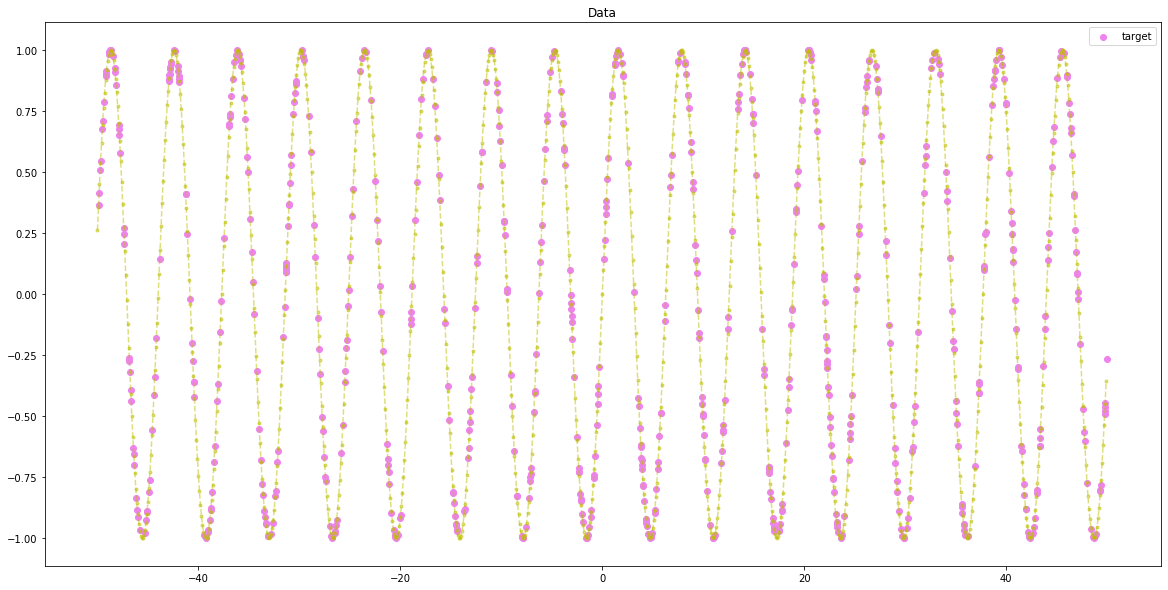

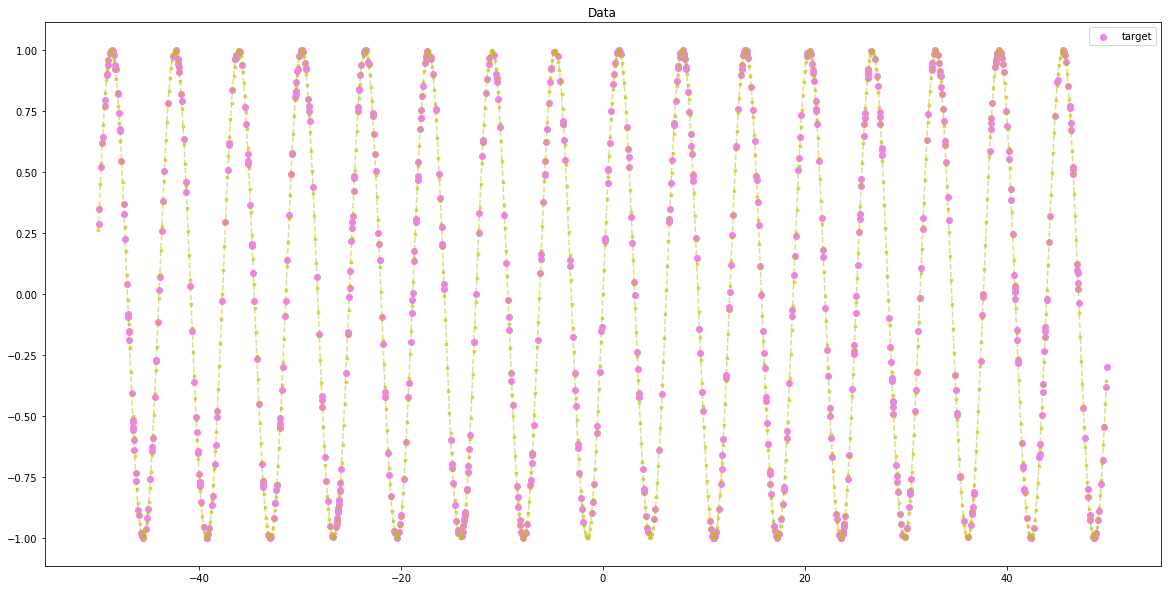

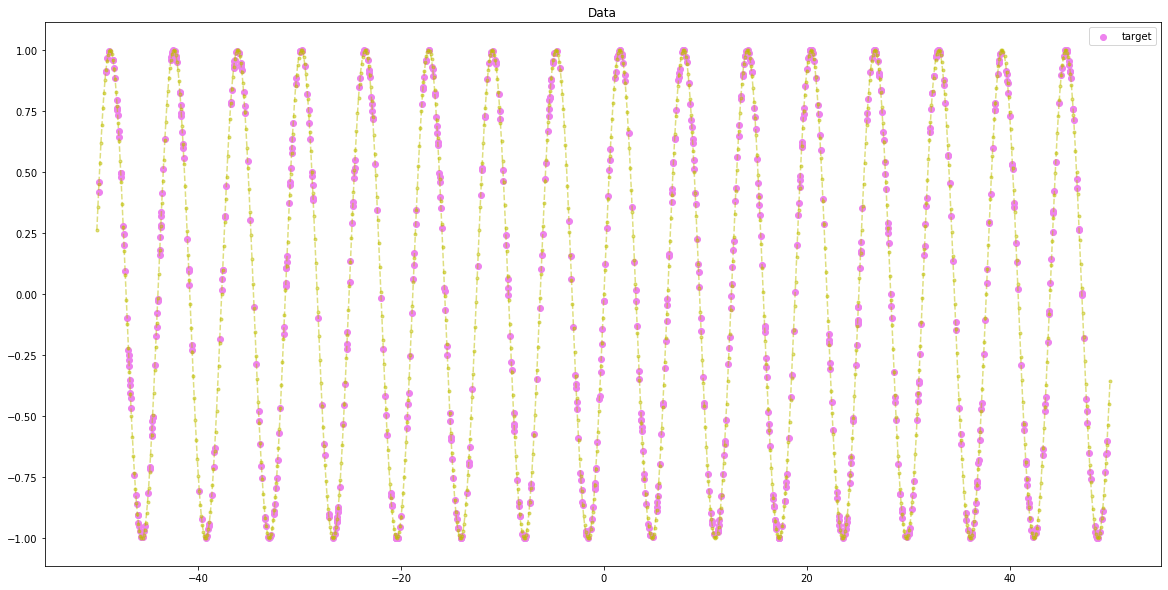

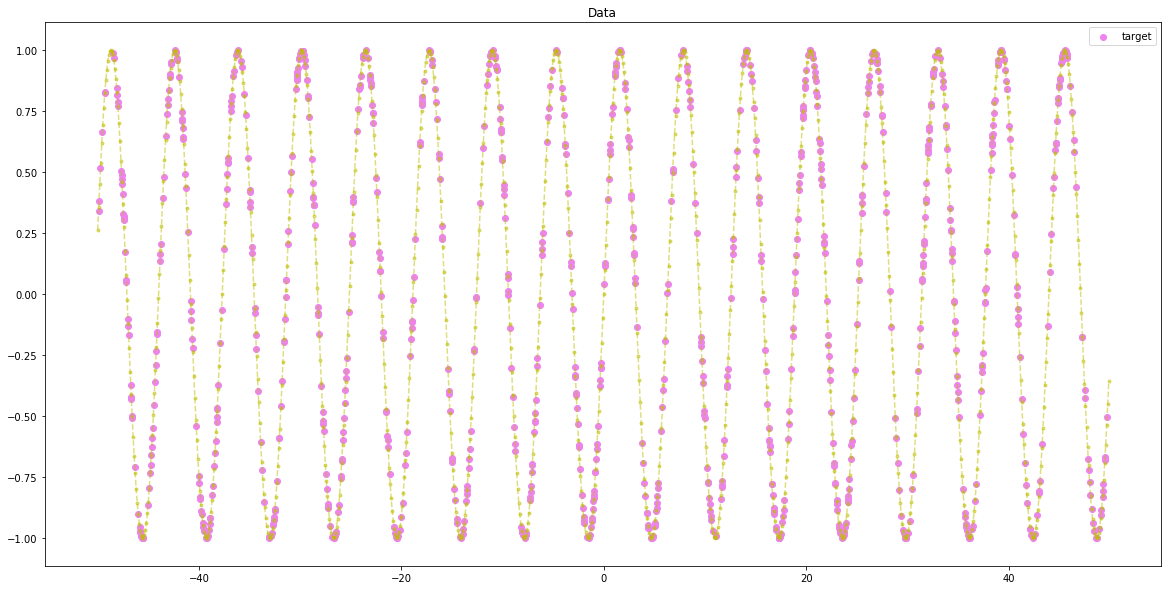

In [19]:
import csv
with open('MLP_Architecture_Search2.csv','w', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(['count', 'model', 'loss' ])
    
    for c in range(100, 1001, 100):
        X_data, Y_data = get_Sin_Data(count=c, a=1, b=1, c=0, d=0)
        plotData(X_data, Y_data, period, params=params, model=None, title_name="Data")

        X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2)

        for l in hidden_layers:
            for n in hidden_neurons:
                name = "hidden_layer_" + str(l)+"_hidden_neurons_"+str(n)
                model, _ = buildFCModel(input_shape=(1,), hidden_layers=l, hidden_neurons=n)
                history = model.fit(X_train % period, Y_train, batch_size=50, epochs=100, validation_data=(X_test % period,Y_test), verbose=0)
                acc = history.history['val_loss'][-1]
                
                model_name = '( '+ str(l) +', ' + str(n) + ' )'
                wr.writerow([c, model_name, acc])

### Visualize Result

In [20]:
import pandas as pd
result = pd.read_csv('./MLP_Architecture_Search2.csv')
print(result)

     count        model      loss
0      100    ( 2, 32 )  0.237794
1      100    ( 2, 64 )  0.238989
2      100   ( 2, 128 )  0.174941
3      100   ( 2, 256 )  0.156031
4      100    ( 4, 32 )  0.194561
5      100    ( 4, 64 )  0.201065
6      100   ( 4, 128 )  0.100483
7      100   ( 4, 256 )  0.069477
8      100    ( 8, 32 )  0.173275
9      100    ( 8, 64 )  0.068884
10     100   ( 8, 128 )  0.037501
11     100   ( 8, 256 )  0.027308
12     100   ( 16, 32 )  0.164111
13     100   ( 16, 64 )  0.023390
14     100  ( 16, 128 )  0.015602
15     100  ( 16, 256 )  0.009873
16     200    ( 2, 32 )  0.205023
17     200    ( 2, 64 )  0.171055
18     200   ( 2, 128 )  0.128080
19     200   ( 2, 256 )  0.095309
20     200    ( 4, 32 )  0.125741
21     200    ( 4, 64 )  0.080567
22     200   ( 4, 128 )  0.079998
23     200   ( 4, 256 )  0.061714
24     200    ( 8, 32 )  0.054198
25     200    ( 8, 64 )  0.038947
26     200   ( 8, 128 )  0.022507
27     200   ( 8, 256 )  0.009816
28     200   (

In [21]:
loss_result = result['loss'].groupby([result['count'], result['model']]).mean()
loss_result = loss_result.unstack()
print(loss_result)

model  ( 16, 128 )  ( 16, 256 )  ( 16, 32 )  ( 16, 64 )  ( 2, 128 )  \
count                                                                 
100       0.015602     0.009873    0.164111    0.023390    0.174941   
200       0.007416     0.002182    0.042410    0.023923    0.128080   
300       0.012596     0.000800    0.019712    0.000639    0.118966   
400       0.003601     0.001013    0.007110    0.000499    0.151100   
500       0.000114     0.000069    0.009531    0.000130    0.070699   
600       0.002106     0.000128    0.000060    0.000168    0.081435   
700       0.000051     0.000043    0.000121    0.000026    0.051206   
800       0.006523     0.016729    0.000028    0.000078    0.098767   
900       0.000814     0.000003    0.000004    0.000037    0.069930   
1000      0.000011     0.000104    0.000023    0.000143    0.059916   

model  ( 2, 256 )  ( 2, 32 )  ( 2, 64 )  ( 4, 128 )  ( 4, 256 )  ( 4, 32 )  \
count                                                                

In [22]:
loss_result.to_csv('loss_result2.csv', encoding='utf-8', index=True)
loss_result = pd.read_csv('loss_result2.csv')

In [24]:
print(loss_result)

   count  ( 16, 128 )  ( 16, 256 )  ( 16, 32 )  ( 16, 64 )  ( 2, 128 )  \
0    100     0.015602     0.009873    0.164111    0.023390    0.174941   
1    200     0.007416     0.002182    0.042410    0.023923    0.128080   
2    300     0.012596     0.000800    0.019712    0.000639    0.118966   
3    400     0.003601     0.001013    0.007110    0.000499    0.151100   
4    500     0.000114     0.000069    0.009531    0.000130    0.070699   
5    600     0.002106     0.000128    0.000060    0.000168    0.081435   
6    700     0.000051     0.000043    0.000121    0.000026    0.051206   
7    800     0.006523     0.016729    0.000028    0.000078    0.098767   
8    900     0.000814     0.000003    0.000004    0.000037    0.069930   
9   1000     0.000011     0.000104    0.000023    0.000143    0.059916   

   ( 2, 256 )  ( 2, 32 )  ( 2, 64 )  ( 4, 128 )  ( 4, 256 )  ( 4, 32 )  \
0    0.156031   0.237794   0.238989    0.100483    0.069477   0.194561   
1    0.095309   0.205023   0.171055  

In [27]:
print(loss_result.columns[1:])
for idx, model in enumerate(loss_result.columns[1:]):
    print(idx, model)

Index(['( 16, 128 )', '( 16, 256 )', '( 16, 32 )', '( 16, 64 )', '( 2, 128 )',
       '( 2, 256 )', '( 2, 32 )', '( 2, 64 )', '( 4, 128 )', '( 4, 256 )',
       '( 4, 32 )', '( 4, 64 )', '( 8, 128 )', '( 8, 256 )', '( 8, 32 )',
       '( 8, 64 )'],
      dtype='object')
0 ( 16, 128 )
1 ( 16, 256 )
2 ( 16, 32 )
3 ( 16, 64 )
4 ( 2, 128 )
5 ( 2, 256 )
6 ( 2, 32 )
7 ( 2, 64 )
8 ( 4, 128 )
9 ( 4, 256 )
10 ( 4, 32 )
11 ( 4, 64 )
12 ( 8, 128 )
13 ( 8, 256 )
14 ( 8, 32 )
15 ( 8, 64 )


### 데이터개수에 따른 모델 robustness

In [28]:
count = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [29]:
plt.rcParams.update({'font.size': 22})

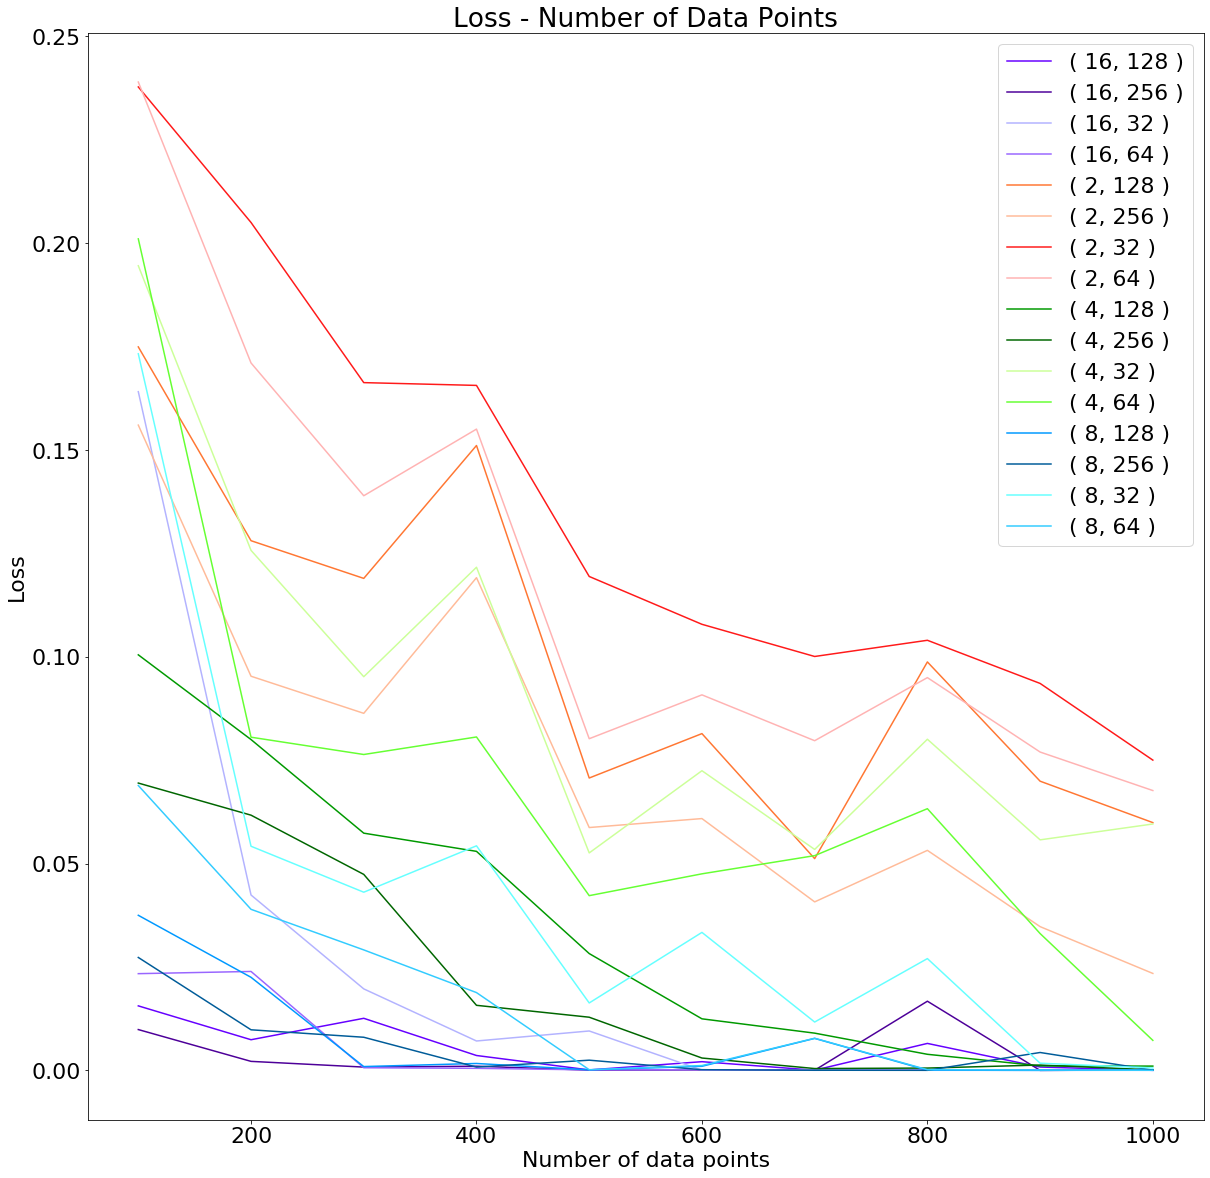

In [31]:
plt.figure(figsize=(20, 20))

color = ['#6600ff','#4d0099','#b3b3ff', '#9966ff',
         '#ff7733', '#ffbb99','#ff1a1a','#ffb3b3',
         '#009900', '#006600','#ccff99', '#66ff33',
         '#0099ff', '#005c99','#66ffff',  '#33ccff',       
        ]

for idx, model in enumerate(loss_result.columns[1:]):
    
    loss_data = []    
    for n in range(10):
        loss_data.append(loss_result.loc[n][idx+1])
 
    plt.plot(count, loss_data, color=color[idx], label=model)
    
plt.xlabel("Number of data points")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss - Number of Data Points")
plt.show()
plt.close()